![](https://ucb.catolica.edu.br/hubfs/SITE/logo__catolica--footer.svg)

## Novas Tecnologias

Professor: Remis Balaniuk, 2024

## Introdução ao Pandas

## O que é o Pandas?

Pandas é uma biblioteca, feita na liguagem Python, que fornece estruturas de dados de alto nível e funções próprias para __análise de dados__ projetadas para tornar o trabalho com dados tabulares ou estruturados mais produtivo e fácil.

In [ ]:
# por convenção utiliza-se o alias pd ao importar a biblioteca Pandas
import pandas as pd
import numpy as np

# outros imports que serão úteis
import os
import re
from collections import OrderedDict

## Estruturas de Dados


### Series

Uma série é um tipo de objeto que armazena uma lista de valores e índices associados a eles.

Esse objeto pode ser comparado a uma coluna do excel ou uma coluna de uma tabela de banco de dados.

In [ ]:
# Criação simples de uma série
s1 = pd.Series(['Mamão', 'Melão', 'Melancia'])

print(type(s1))

s1

<class 'pandas.core.series.Series'>


0       Mamão
1       Melão
2    Melancia
dtype: object

In [ ]:
s11 = pd.Series(['Mamão', 'Melão', 'Melão','Melancia'])

print(type(s11))

s11

<class 'pandas.core.series.Series'>


0       Mamão
1       Melão
2       Melão
3    Melancia
dtype: object

In [ ]:
print(['Mamão', 'Melão', 'Melancia'])

['Mamão', 'Melão', 'Melancia']


In [ ]:
s1[2]

'Melancia'

In [ ]:
s11.describe()

count         4
unique        3
top       Melão
freq          2
dtype: object

In [ ]:
s1.shape

(3,)

In [ ]:
# Criação de uma série com o nome associado (nome da coluna no excel)
s2 = pd.Series(['Cão', 'Gato', 'Cavalo'], name='Animais')
s2

0       Cão
1      Gato
2    Cavalo
Name: Animais, dtype: object

## Índices versus dados

O Pandas mistura os conceitos de dicionário e lista, permitindo que a coleção de dados propriamente dita seja acessível pela posição (índice sequencial) ou por algum índice (chamado genericamente de "index") criado como uma coleção de chaves que apontam para os dados.

O index é como um endereço, e é assim que qualquer ponto de dados num dataframe ou série de dados Pandas pode ser acessado. Linhas e colunas têm índices.


In [ ]:
# Criação de uma série com nome e índice
s3 = pd.Series(
    [27, 28.3, 29.1],
    name='Temperatura',
    index=['2018-02-01', '2018-02-02', '2018-02-03']
)
s3

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura, dtype: float64

In [ ]:
s3['2018-02-01']

27.0

In [ ]:
s3[1]

28.3

In [ ]:
# Criação de uma série à partir de um dicionário
s4 = pd.Series(
    {
        '2018-02-01': 27,
        '2018-02-02': 28.3,
        '2018-02-03': 29.1,
    },
    name='Temperatura',
)
s4

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura, dtype: float64

Algumas diferenças entre série e dicionário:

- série permite acesso por índice e por posição

- no dicionário o acesso é somente pelo índice

In [ ]:
s4[:2]

2018-02-01    27.0
2018-02-02    28.3
Name: Temperatura, dtype: float64

In [ ]:
for i in range(len(s4)):
  print(s4[i])

27.0
28.3
29.1


In [ ]:
s4['2018-02-02']

28.3

In [ ]:
s4[1]

28.3

In [ ]:
d =  {
        '2018-02-01': 27,
        '2018-02-02': 28.3,
        '2018-02-03': 29.1,
    }

In [ ]:
type(d)

dict

In [ ]:
d['2018-02-01']

27

In [ ]:
d[1]

KeyError: 1

#### Características, métodos e operações

* alguns atributos importantes

In [ ]:
print('Valores:', s4.values, '\nTipo:', type(s4.values))
print('\nÍndices:', s4.index, '\nTipo:', type(s4.index))
print('\nNome:', s4.name, '\nTipo:', type(s4.name))
print('\nShape:', s4.shape, '\nTipo:', type(s4.shape))

Valores: [27.  28.3 29.1] 
Tipo: <class 'numpy.ndarray'>

Índices: Index(['2018-02-01', '2018-02-02', '2018-02-03'], dtype='object') 
Tipo: <class 'pandas.core.indexes.base.Index'>

Nome: Temperatura 
Tipo: <class 'str'>

Shape: (3,) 
Tipo: <class 'tuple'>


In [ ]:
s4.values.argmax()

2

* As séries possuem características de tipos sequenciais, ou seja, podem ser fatiadas, acessadas ou modificadas pela ordem numérica. Além disso, é um objeto compatível com ndarray do NumPy, dessa forma aceita expressões e pode ser utilizado como parâmetro para a maioria das funções disponíveis no NumPy

In [ ]:
xx = s4[:2]

In [ ]:
type(xx)

pandas.core.series.Series

In [ ]:
s4[ s4 >= 28 ]

2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura, dtype: float64

In [ ]:
s4_str = s4.astype(str)
print('\n', s4_str, sep='')


2018-02-01    27.0
2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: object


In [ ]:
type(s4[0])

numpy.float64

In [ ]:
# utilizando índice de ordem
print(s4[0])

# utilizando sintaxe de slices
print('\n', s4[:2], sep='')

# utilizando expressões booleanas para slices
print('\n', s4[ s4 >= 28 ], sep='')

# alterando um valor
s4[2] = 30.1
print('\n', s4[2], sep='')

# alterando o tipo
s4_str = s4.astype(str)
print('\n', s4_str, sep='')

# redefinindo o índice
s4_str.index = pd.Index(['b', 'c', 'a'])
print('\n', s4_str, sep='')
s4_str = s4_str.sort_index()
print('\n', s4_str, sep='')

27.0

2018-02-01    27.0
2018-02-02    28.3
Name: Temperatura, dtype: float64

2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: float64

30.1

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: object

b    27.0
c    28.3
a    30.1
Name: Temperatura, dtype: object

a    30.1
b    27.0
c    28.3
Name: Temperatura, dtype: object


In [ ]:
s4_str[0]

'30.1'

In [ ]:
# fazendo slice no índice
s4['2018-02-02':]

2018-02-02    28.3
2018-02-03    30.1
Name: Temperatura, dtype: float64

In [ ]:
# fazendo slice no índice
s4['2018-02-01':'2018-02-02']

2018-02-01    27.0
2018-02-02    28.3
Name: Temperatura, dtype: float64

In [ ]:
s4[0:1]

2018-02-01    27.0
Name: Temperatura, dtype: float64

* as séries podem ser comparadas a um dicionário de tamanho fixo, onde valores podem ser recuperados e alterados pela sua chave, que consiste no índice

In [ ]:
print(28.3 in s4)

False


In [ ]:
# retornar valor utilizando colchetes e o índice desejado
print(s4['2018-02-02'])

# se utilizarmos colchetes para uma chave não existente teremos um erro
try:
    print(s4['2018-02-10'])
except Exception as e:
    print('{}:'.format(e.__class__.__name__), e)

# utilizar o método get apenas retorna None se o índice não existir
print(s4.get('2018-02-10'))

# é possível testar se um índice está na série
print('2018-02-02' in s4)

# é possível testar se um valor está na série
print(28.3 in s4.values)


28.3
KeyError: '2018-02-10'
None
True
True


## Percorrendo a série

In [ ]:
for i in s4.index:
  print(i,s4[i])

2018-02-01 27.0
2018-02-02 28.3
2018-02-03 30.1


In [ ]:
for i in s4.values:
  print(i)

27.0
28.3
30.1


In [ ]:
for i in range(len(s4)):
  print(i,s4[i])

0 27.0
1 28.3
2 30.1


In [ ]:
for i in range(len(s4)):
  print(s4.index[i])

2018-02-01
2018-02-02
2018-02-03


In [ ]:
for i in range(s4.shape[0]):
  print(s4.index[i],s4.values[i])

2018-02-01 27.0
2018-02-02 28.3
2018-02-03 30.1


## Exercício 1

Crie uma série para armazenar os valores da tabela abaixo (casos da covid por estado em 11/5/2020):

Estado	totaldecasos

AC	1447
AL	2258
AM	12599
AP	2613
BA	5774
CE	16775
DF	2682
ES	4599
GO	1093
MA	8144
MG	3320
MS	362
MT	519
PA	7563
PB	2341
PE	13275
PI	1332
PR	1835
RJ	17062
RN	1928
RO	1302
RR	1290
RS	2576
SC	3429
SE	1771
SP	46131
TO	747


Explore sua série.

In [ ]:
covid = pd.Series({'AC':1447.0,'AL':2258, 'AM':12599,'AP':2613,'BA':5774,'CE':16775,'DF':2682,'ES':4599,'GO':1093,'MA':8144,'MG':3320,'MS':362,'MT':519,'PA':7563,'PB':2341,'PE':13275,'PI':1332,'PR':1835,'RJ':17062,'RN':1928,'RO':1302,'RR':1290,'RS':2576,'SC':3429,'SE': 1771,'SP':46131,'TO':747})

In [ ]:
covids = pd.Series({'AC':1447,'AL':'2258', 'AM':12599,'AP':2613,'BA':5774,'CE':16775,'DF':2682,'ES':4599,'GO':1093,'MA':8144,'MG':3320,'MS':362,'MT':519,'PA':7563,'PB':2341,'PE':13275,'PI':1332,'PR':1835,'RJ':17062,'RN':1928,'RO':1302,'RR':1290,'RS':2576,'SC':3429,'SE': 1771,'SP':46131,'TO':747})

In [ ]:
covids

AC     1447
AL     2258
AM    12599
AP     2613
BA     5774
CE    16775
DF     2682
ES     4599
GO     1093
MA     8144
MG     3320
MS      362
MT      519
PA     7563
PB     2341
PE    13275
PI     1332
PR     1835
RJ    17062
RN     1928
RO     1302
RR     1290
RS     2576
SC     3429
SE     1771
SP    46131
TO      747
dtype: object

In [ ]:
covid.describe()

count       27.000000
mean      6102.481481
std       9367.877349
min        362.000000
25%       1389.500000
50%       2576.000000
75%       6668.500000
max      46131.000000
dtype: float64

<Axes: >

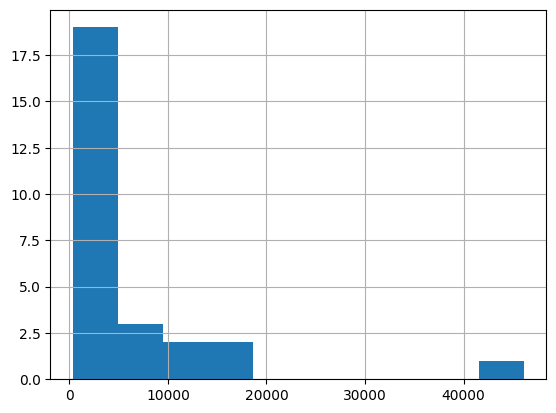

In [ ]:
covid.hist()

In [ ]:
covid

In [ ]:
covid.median()

2576.0

In [ ]:
covid = covid.sort_values(ascending = False)

In [ ]:
covid[0]

46131.0

### Tratamento de exceções no Python

Como visto, diversas operações de um script podem não ser realizáveis, o que acarreta um erro e a interrupção da execução. Para lidar com essa situação podemos usar o comando "try", que supervisiona a execução de um bloco de instruções e captura o erro se ele ocorrer:

In [ ]:
x = input("digite um número:")
try:
  print(1/float(x))
except:
  print("Erro ao calcular 1/x")

digite um número:0
Erro ao calcular 1/x


É possível filtrar um tipo de erro específico:

In [ ]:
x = input("digite um número:")
try:
  print(1/float(x))
except(ZeroDivisionError):
  print("Divisão por zero!")

digite um número:0
Divisão por zero!


É possível também "criar" um erro para avisar que algum problema ocorreu:

In [ ]:
x = input("digite um número:")
try:
  if float(x)==0:
    raise Exception("A operação não admite zero!")
  print(1/float(x))
except Exception as er:
  print("Erro na operação:",er)

digite um número:0
Erro na operação: A operação não admite zero!


Para mais informações sobre códigos de erro visite: https://www.tutorialsteacher.com/python/error-types-in-python

### Voltando às séries Pandas:

* as séries aceitam operações vetorizadas, mas o alinhamento para as operações são sempre baseado no índice

In [ ]:
s55 = pd.Series(
    [27, 28.3, 29.1,np.nan],
    name='Temperatura Sensor A',
    index=['2018-02-01', '2018-02-02', '2018-02-03','2018-02-05']
)

In [ ]:
s55.notna()

2018-02-01     True
2018-02-02     True
2018-02-03     True
2018-02-05    False
Name: Temperatura Sensor A, dtype: bool

In [ ]:
s55[s55.notna()]

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura Sensor A, dtype: float64

In [ ]:
s6 = pd.Series(
    [28.6, 32.1, 26],
    name='Temperatura Sensor B',
    index=['2018-02-02', '2018-02-03', '2018-02-04']
)

In [ ]:
s55

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
2018-02-05     NaN
Name: Temperatura Sensor A, dtype: float64

In [ ]:
s6

2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
Name: Temperatura Sensor B, dtype: float64

In [ ]:
res = (s55 + s6)/2

In [ ]:
res

2018-02-01      NaN
2018-02-02    28.45
2018-02-03    30.60
2018-02-04      NaN
2018-02-05      NaN
dtype: float64

In [ ]:
res[res.notna()]

2018-02-02    28.45
2018-02-03    30.60
dtype: float64

In [ ]:
# medições de temperatura
s55 = pd.Series(
    [27, 28.3, 29.1,np.nan],
    name='Temperatura Sensor A',
    index=['2018-02-01', '2018-02-02', '2018-02-03','2018-02-05']
)

print('\n s55:\n', s55, "\n","\nteste de Nan:\n",s55.isna(),"\n",sep='')
#s5.notna() para obter os que não são NaN
s5 = s55[s55.notna()]

print('\ns5:\n', s5, sep='')

s6 = pd.Series(
    [28.6, 32.1, 26],
    name='Temperatura Sensor B',
    index=['2018-02-02', '2018-02-03', '2018-02-04']
)
print('\ns6:\n', s6, sep='')

# média
s7 = (s5 + s6)/2
s7.rename('Temperatura Média', inplace=True)
print('\n', s7, sep='')


 s55:
2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
2018-02-05     NaN
Name: Temperatura Sensor A, dtype: float64

teste de Nan:
2018-02-01    False
2018-02-02    False
2018-02-03    False
2018-02-05     True
Name: Temperatura Sensor A, dtype: bool


s5:
2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
Name: Temperatura Sensor A, dtype: float64

s6:
2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
Name: Temperatura Sensor B, dtype: float64

2018-02-01      NaN
2018-02-02    28.45
2018-02-03    30.60
2018-02-04      NaN
Name: Temperatura Média, dtype: float64


# Exercício 2

Altere as séries acima de forma a obter uma série média sem NaN. Nessa solução filtre os NaN após a operação de média.

### Concatenando séries

In [ ]:
s55

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
2018-02-05     NaN
Name: Temperatura Sensor A, dtype: float64

In [ ]:
s56 = pd.concat([s55,s6])

In [ ]:
print(s55,s6,s56,sep='\n')

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
2018-02-05     NaN
Name: Temperatura Sensor A, dtype: float64
2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
Name: Temperatura Sensor B, dtype: float64
2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
2018-02-05     NaN
2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
dtype: float64


# Exercício 2.1

Altere as séries acima de forma a obter uma série média sem NaN. Nessa solução encontre as partes séries que não são coincidentes e considere que nessas datas, de uma só medida, a "média" é a medida existente. Para a resposta final concatene as séries.

In [ ]:
res = (s55 + s6)/2
res

2018-02-01      NaN
2018-02-02    28.45
2018-02-03    30.60
2018-02-04      NaN
2018-02-05      NaN
dtype: float64

In [ ]:
res = (s55 + s6)/2
res = res[res.notna()]
for i in s55[s55.notna()].index:
  if i not in s6 :
    res[i] = s55[i]
for i in s6[s6.notna()].index:
  if i not in s55:
    res[i] = s6[i]


In [ ]:
s7 = res

In [ ]:
s7

2018-02-01    27.00
2018-02-02    28.45
2018-02-03    30.60
2018-02-04    26.00
dtype: float64

In [ ]:
res = res.sort_index()

In [ ]:
res

2018-02-01    27.00
2018-02-02    28.45
2018-02-03    30.60
2018-02-04    26.00
dtype: float64

### Alguns métodos comuns nas séries

In [ ]:
s8.describe()

count    15.000000
mean     24.866667
std       7.717019
min      13.000000
25%      18.000000
50%      25.000000
75%      31.500000
max      36.000000
dtype: float64

In [ ]:
temperaturas = [17, 18, 24, 27, 18, 25, 27, 35, 35, 18, 17, 13, 36, 32, 31]
s8 = pd.Series(temperaturas)

# contagem do número de elementos
print('contagem: ',s8.count())

# menor valor
print('min: ', s8.min())

# maior valor
print('max: ', s8.max())

# média
print('mean: ', s8.mean())

# mediana
print('median: ', s8.median())

contagem:  15
min:  13
max:  36
mean:  24.866666666666667
median:  25.0


In [ ]:
s8.argmax()

12

In [ ]:
s8.values.argmax()

12

In [ ]:
#mostra os valores iniciais
s8.head()

0    17
1    18
2    24
3    27
4    18
dtype: int64

In [ ]:
s8.head(10)

0    17
1    18
2    24
3    27
4    18
5    25
6    27
7    35
8    35
9    18
dtype: int64

Mostra os valores finais:

In [ ]:
#mostra os valores finais
s8.tail()

10    17
11    13
12    36
13    32
14    31
dtype: int64

In [ ]:
# faz uma amostragem aleatória
s8.sample(3)

0     17
4     18
12    36
dtype: int64

In [ ]:
s8.sort_values(ascending = False)

12    36
7     35
8     35
13    32
14    31
3     27
6     27
5     25
2     24
1     18
4     18
9     18
0     17
10    17
11    13
dtype: int64

In [ ]:
sm30 = s8[s8 > 30]

In [ ]:
(s8 > 30).sum()

5

In [ ]:
x.sum()

5

Documentação do Pandas para a classe Series:
https://pandas.pydata.org/pandas-docs/stable/api.html#series

# Exercício 3

Crie uma série com as variáveis de câmbio e índice definidas abaixo:

cambiodolarAg1 = [2.4, 2.2, 2.5, 2.0, 2.3, 2.25]

indices = ['2017-05-03','2017-05-04','2017-05-05','2017-05-06','2017-05-07','2017-05-08'].

Em seguida faça:

- Mostre as estatísticas básicas da série

- Filtre os registros pelo índice 2017-05-04

- Filtre os registros pelo intervalo 2017-05-04 a 2017-05-06

- Mostre as estatísticas básicas só para a seleção acima

- Filtre os registros das posições 1 a 3 (final incluso)

- Filtre os registros com cambio maior que 2.2



In [ ]:
cambiodolarAg1 = pd.Series([2.4, 2.2, 2.5, 2.0, 2.3, 2.25],
index = ['2017-05-03','2017-05-04','2017-05-05','2017-05-06','2017-05-07','2017-05-08'],
                           name = 'cambiodolarAg1')

In [ ]:
cambiodolarAg1.describe()

count    6.000000
mean     2.275000
std      0.172482
min      2.000000
25%      2.212500
50%      2.275000
75%      2.375000
max      2.500000
Name: cambiodolarAg1, dtype: float64

In [ ]:
cambiodolarAg1['2017-05-04':'2017-05-06'].describe()

count    3.000000
mean     2.233333
std      0.251661
min      2.000000
25%      2.100000
50%      2.200000
75%      2.350000
max      2.500000
Name: cambiodolarAg1, dtype: float64

In [ ]:
cambiodolarAg1[1:4]

2017-05-04    2.2
2017-05-05    2.5
2017-05-06    2.0
Name: cambiodolarAg1, dtype: float64

In [ ]:
cambiodolarAg1[cambiodolarAg1 > 2.2]

2017-05-03    2.40
2017-05-05    2.50
2017-05-07    2.30
2017-05-08    2.25
Name: cambiodolarAg1, dtype: float64

In [ ]:
s8

0     17
1     18
2     24
3     27
4     18
5     25
6     27
7     35
8     35
9     18
10    17
11    13
12    36
13    32
14    31
dtype: int64

### DataFrame

É um objeto que representa uma matriz de 2 dimensões, onde todas as colunas são alinhadas pelo mesmo índice. Um dataframe pode ter séries (colunas) com tipos diferentes.

Pode ser comparado a uma planilha excel ou a uma tabela de banco de dados.

In [ ]:
# Criação de um DataFrame à partir de um dicionário de séries de mesmo índice
d = OrderedDict({
    'Sensor A': s5,
    'Sensor B': s6,
    'Médias': s7,
})
df1 = pd.DataFrame(d)
df1

NameError: name 's5' is not defined

In [ ]:
df1.describe()

,Sensor A,Sensor B,Médias
count,3.000000,3.000000,2.00000
mean,28.133333,28.900000,29.52500
std,1.059874,3.061046,1.52028
min,27.000000,26.000000,28.45000
25%,27.650000,27.300000,28.98750
50%,28.300000,28.600000,29.52500
75%,28.700000,30.350000,30.06250
max,29.100000,32.100000,30.60000


In [ ]:
print(s55,s6,s7)

2018-02-01    27.0
2018-02-02    28.3
2018-02-03    29.1
2018-02-05     NaN
Name: Temperatura Sensor A, dtype: float64 2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
Name: Temperatura Sensor B, dtype: float64 2018-02-01    27.00
2018-02-02    28.45
2018-02-03    30.60
2018-02-04    26.00
dtype: float64


In [ ]:
#versão curta
d = {
    'Sensor A': s55,
    'Sensor B': s6,
    'Médias': s7,
}
df1 = pd.DataFrame(d)
df1

,Sensor A,Sensor B,Médias
2018-02-01,27.0,NaN,27.00
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,26.00
2018-02-05,NaN,NaN,NaN


In [ ]:
df1.values

array([[27.  ,   nan, 27.  ],
       [28.3 , 28.6 , 28.45],
       [29.1 , 32.1 , 30.6 ],
       [  nan, 26.  , 26.  ],
       [  nan,   nan,   nan]])

In [ ]:
df1.index

Index(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05'], dtype='object')

In [ ]:
type(df1.values)

numpy.ndarray

In [ ]:
df1.index

Index(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04'], dtype='object')

In [ ]:
type(df1.index)

pandas.core.indexes.base.Index

Observem que o índice do dataframe é formado pela união dos elementos dos índices de cada série.

Se para uma determinada posição do índice, uma série não tiver um valor definido, é automaticamente inserido um `NaN` correspondente a *Not a Number*, que identifica um dado faltante.

In [ ]:
# se passarmos uma lista com os índices, todos os dados que não estiverem
# de acordo com os índices informados serão descartados
df2 = pd.DataFrame(d, index=['2018-02-02', '2018-02-03'])
df2

,Sensor A,Sensor B,Médias
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60


In [ ]:
# Criação de um DataFrame à partir de um dicionário de listas (todas do mesmo comprimento)

d = dict({
    'Produto': ['Maçã', 'Leite', 'Canela'],
    'Unidade de Medida': ['kg', 'L', 'g'],
    'Valor Unitário': [4.99, 6.7, 1.6],
})
df3 = pd.DataFrame(d)
df3

,Produto,Unidade de Medida,Valor Unitário
0,Maçã,kg,4.99
1,Leite,L,6.70
2,Canela,g,1.60


In [ ]:
df3.values

array([['Maçã', 'kg', 4.99],
       ['Leite', 'L', 6.7],
       ['Canela', 'g', 1.6]], dtype=object)

In [ ]:
type(df3.values)

numpy.ndarray

In [ ]:
df3.values.shape

(3, 3)

In [ ]:
# Se nenhum índice é informado, o DataFrame terá um RangeIndex iniciando em 0.
print(df3.index)

RangeIndex(start=0, stop=3, step=1)


Definindo um índice usando umas das colunas (os valores não podem repetir):

In [ ]:
df3 = df3.set_index('Produto')

In [ ]:
df3

,Unidade de Medida,Valor Unitário
Produto,,
Maçã,kg,4.99
Leite,L,6.70
Canela,g,1.60


In [ ]:
print(df3.index)

Index(['Maçã', 'Leite', 'Canela'], dtype='object', name='Produto')


In [ ]:
# Uma série pode ser transformada em um DataFrame de uma coluna utilizando o método 'to_frame'
df4 = s7.to_frame()
df4

,0
2018-02-01,27.00
2018-02-02,28.45
2018-02-03,30.60
2018-02-04,26.00


## Criando o dataframe a partir de uma lista de tuplas

In [ ]:
nomes_colunas = ['Produto', 'Peso', 'Preço']

produtos = [
            ('Picanha',2.5,150.20),
            ('Tomate',1.2,12.5),
            ('Banana',1.5,8.3),
            ('Maça',0.8,5.8)
]

In [ ]:
df100 = pd.DataFrame(produtos,columns = nomes_colunas)

In [ ]:
df100.head()

,Produto,Peso,Preço
0,Picanha,2.5,150.2
1,Tomate,1.2,12.5
2,Banana,1.5,8.3
3,Maça,0.8,5.8


* Características e atributos importantes do dataframe


In [ ]:
print('Valores:', df1.values, '\nTipo:', type(df1.values))
print('\nÍndices:', df1.index, '\nTipo:', type(df1.index))
print('\Colunas:', df1.columns, '\nTipo:', type(df1.columns))
print('\nShape:', df1.shape, '\nTipo:', type(df1.shape))

Valores: [[27.     nan   nan]
 [28.3  28.6  28.45]
 [29.1  32.1  30.6 ]
 [  nan 26.     nan]] 
Tipo: <class 'numpy.ndarray'>

Índices: Index(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04'], dtype='object') 
Tipo: <class 'pandas.core.indexes.base.Index'>
\Colunas: Index(['Sensor A', 'Sensor B', 'Médias'], dtype='object') 
Tipo: <class 'pandas.core.indexes.base.Index'>

Shape: (4, 3) 
Tipo: <class 'tuple'>


O dataframe possui o método info() que descreve algumas características básicas como, tipo de dado, quantidade de registros, intervalo do índice, registros não nulos por coluna e tamanho em memória.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2018-02-01 to 2018-02-05
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sensor A  3 non-null      float64
 1   Sensor B  3 non-null      float64
 2   Médias    4 non-null      float64
dtypes: float64(3)
memory usage: 160.0+ bytes


In [ ]:
df1.describe()

,Sensor A,Sensor B,Médias
count,3.000000,3.000000,4.00000
mean,28.133333,28.900000,28.01250
std,1.059874,3.061046,1.99682
min,27.000000,26.000000,26.00000
25%,27.650000,27.300000,26.75000
50%,28.300000,28.600000,27.72500
75%,28.700000,30.350000,28.98750
max,29.100000,32.100000,30.60000


A operação padrão de indexação/fatiamento do DataFrame é um pouco diferente do fatiamento (*slicing*) de uma Série. Enquanto a série representa apenas uma coluna, o dataframe pode conter várias colunas.

Dessa forma, os slices no dataframe podem abranger linhas e/ou colunas. Abaixo veremos uma série de exemplos simples de slices em DataFrames.

In [ ]:
# seleção de uma coluna no dataframe retorna uma série
x = df1['Sensor A']

In [ ]:
type(x)

pandas.core.series.Series

Para acessar pela chave do índice usa-se a função "loc".

In [ ]:
# a seleção de uma linha também retorna uma série
linha = df1.loc['2018-02-01']

In [ ]:
type(linha)

pandas.core.series.Series

In [ ]:
#note que os nomes das colunas viraram ínidces na série criada
print(linha,linha.index,linha.values,sep='\n')

Sensor A    27.0
Sensor B     NaN
Médias       NaN
Name: 2018-02-01, dtype: float64
Index(['Sensor A', 'Sensor B', 'Médias'], dtype='object')
[27. nan nan]


In [ ]:
# seleção de mais de uma coluna no dataframe retorna um novo dataframe com a seleção
y = df1[['Sensor B', 'Sensor A']]

In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
# da mesma forma, a seleção de mais de uma linha no dataframe retorna um novo dataframe com a seleção
df1.loc[['2018-02-01','2018-02-02']]

,Sensor A,Sensor B,Médias
2018-02-01,27.0,NaN,NaN
2018-02-02,28.3,28.6,28.45


Selecionando uma posição específica (linha e coluna):

In [ ]:
df1.loc['2018-02-01','Sensor A']

27.0

É possível selecionar algumas linhas e colunas simultaneamente:

In [ ]:
df1.loc[['2018-02-01','2018-02-02'],['Sensor A', 'Sensor B']]

,Sensor A,Sensor B
2018-02-01,27.0,NaN
2018-02-02,28.3,28.6


In [ ]:
# se for especificada uma ordem diferente um novo dataframe sera
# criado com as colunas na ordem informada
df1[['Sensor B', 'Sensor A']]

,Sensor B,Sensor A
2018-02-01,NaN,27.0
2018-02-02,28.6,28.3
2018-02-03,32.1,29.1
2018-02-04,26.0,NaN


In [ ]:
# um dataframe pode ser criado à partir de outro de forma fácil (isso não copia os dados)
df5 = pd.DataFrame(df1)

In [ ]:
# ou por uma cópia profunda que cria um novo objeto com sua própria cópia dos dados:
df6 = df1.copy()

df6

,Sensor A,Sensor B,Médias
2018-02-01,27.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


É importante entender que um novo dataframe será criado apenas utilizando a função `copy()` ou o construtor da classe `pd.DataFrame()`. Caso atribua um dataframe existente a uma nova variável, não há criação de um novo dataframe. Ambas as variáveis passam a se referir ao mesmo dataframe, o que frequentemente gera confusão. Veja o exemplo abaixo:

In [ ]:
# Uma nova variável refere-se ao dataframe anterior associado a df6:
df7 = df6

# Os três dataframes possuem o valor 27 para o Sensor A em 2018-02-01, que pode ser obtido utilizando-se o acessor `.loc[]`
print(df5.loc['2018-02-01','Sensor A'])
print(df6.loc['2018-02-01','Sensor A'])
print(df7.loc['2018-02-01','Sensor A'])

27.0
27.0
27.0


In [ ]:
# Caso alteremos esse valor para df7:
df7.loc['2018-02-01','Sensor A'] = 30

# Será também alterado para df6, pois esse referencia o mesmo único objeto:
print(df6.loc['2018-02-01','Sensor A'])
print(df7.loc['2018-02-01','Sensor A'])

30.0
30.0


In [ ]:
# Já o valor para df1, do qual df6 é uma cópia profunda, não foi alterado:
print(df1.loc['2018-02-01','Sensor A'])
print(df5.loc['2018-02-01','Sensor A'])

27.0
27.0


In [ ]:
# df5 foi criado a partir do construtor de pd.DataFrame(df1), o que também não recopia os dados:
# Ou seja, alterando df5:
df5.loc['2018-02-01','Sensor A'] = 20

In [ ]:
# Também altera-se df1:
print(df1.loc['2018-02-01','Sensor A'])

20.0


In [ ]:
df5

,Sensor A,Sensor B,Médias
2018-02-01,20.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


In [ ]:
#novas colunas podem ser criadas no dataframe à partir de um valor escalar
df5['Sensor C'] = 30

df5

,Sensor A,Sensor B,Médias,Sensor C
2018-02-01,20.0,NaN,NaN,30
2018-02-02,28.3,28.6,28.45,30
2018-02-03,29.1,32.1,30.60,30
2018-02-04,NaN,26.0,NaN,30


In [ ]:
df1

,Sensor A,Sensor B,Médias
2018-02-01,20.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


In [ ]:
# novas colunas podem ser criadas no dataframe à partir de listas,
# desde que o número de linhas seja igual ao do dataframe
df5['Sensor D'] = [1,2,3,4]
df5

,Sensor A,Sensor B,Médias,Sensor C,Sensor D
2018-02-01,20.0,NaN,NaN,30,1
2018-02-02,28.3,28.6,28.45,30,2
2018-02-03,29.1,32.1,30.60,30,3
2018-02-04,NaN,26.0,NaN,30,4


In [ ]:
# note que as colunas inseridas em df5 não aparecem em df1, de onde df5 se originou
df1

,Sensor A,Sensor B,Médias
2018-02-01,20.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


In [ ]:
# colunas podem ser removidas com o comando del (veja mais sobre o del na documentação do python)
del(df5['Sensor C'])
del(df5['Sensor D'])
df5

,Sensor A,Sensor B,Médias
2018-02-01,20.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


In [ ]:
del df7

In [ ]:
# as listas de colunas e índices podem ter nomes atribuídos
df5.columns.name = 'Sensores'
df5.index.name = 'Data'

df5

Sensores,Sensor A,Sensor B,Médias
Data,,,
2018-02-01,20.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


A maioria dos métodos vistos para Series funcionam para DataFrames também, mas podem ter variações ou limitações dependendo do tipo de dado de cada série.

In [ ]:
#totalizações por coluna
#valor mínimo por coluna
print('min:\n', df1.min())

# maior valor
print('\nmax:\n', df1.max())

# média
print('\nmean:\n', df1.mean())

# mediana
print('\nmedian:\n', df1.median())

min:
 Sensor A    20.00
Sensor B    26.00
Médias      28.45
dtype: float64

max:
 Sensor A    29.1
Sensor B    32.1
Médias      30.6
dtype: float64

mean:
 Sensor A    25.800
Sensor B    28.900
Médias      29.525
dtype: float64

median:
 Sensor A    28.300
Sensor B    28.600
Médias      29.525
dtype: float64


In [ ]:
#totalizações por linha  NOTE QUE A OPERAÇÃO AGREGADA DESPREZA OS NaN
print(df1)
#valor mínimo por linha
print('min:\n', df1[['Sensor A','Sensor B']].min(axis=1))

# maior valor
print('\nmax:\n', df1[['Sensor A','Sensor B']].max(axis=1))

# média
print('\nmean:\n', df1[['Sensor A','Sensor B']].mean(axis=1))

# mediana
print('\nmedian:\n', df1[['Sensor A','Sensor B']].median(axis=1))

            Sensor A  Sensor B  Médias
Data                                  
2018-02-01      20.0       NaN     NaN
2018-02-02      28.3      28.6   28.45
2018-02-03      29.1      32.1   30.60
2018-02-04       NaN      26.0     NaN
min:
 Data
2018-02-01    20.0
2018-02-02    28.3
2018-02-03    29.1
2018-02-04    26.0
dtype: float64

max:
 Data
2018-02-01    20.0
2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
dtype: float64

mean:
 Data
2018-02-01    20.00
2018-02-02    28.45
2018-02-03    30.60
2018-02-04    26.00
dtype: float64

median:
 Data
2018-02-01    20.00
2018-02-02    28.45
2018-02-03    30.60
2018-02-04    26.00
dtype: float64


## Transposta

Permite visualizar o dataframe com os índices como colunas e as colunas como índices

In [ ]:
df5t = df5.T
df5t

Data,2018-02-01,2018-02-02,2018-02-03,2018-02-04
Sensores,,,,
Sensor A,20.0,28.30,29.1,NaN
Sensor B,NaN,28.60,32.1,26.0
Médias,NaN,28.45,30.6,NaN


In [ ]:
df5t.min(axis=1)

Sensores
Sensor A    20.00
Sensor B    26.00
Médias      28.45
dtype: float64

Documentação do Pandas para a classe DataFrame:
https://pandas.pydata.org/pandas-docs/stable/api.html#series

### Pandas
* outras formas de criar DataFrames podem ser consultadas aqui: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#alternate-constructors

# Exercício 4

A partir da série criada no exercício 3 crie outras duas com valores  fictícios de dolar em datas próximas para mais duas agências, com interseções mas também com datas novas. Em seguida crie um dataframe com as três séries de cotações e uma quarta série com o valor médio do dólar no dia. Obtenha as estatísticas básicas do seu dataframe. Em seguida mostre qual o maior e o menor valor do dolar a cada dia.

# Seleções e subconjuntos de dados

Esta seção pretende reforçar as  mais variadas formas de seleções de dados utilizando DataFrames, Séries e Índices.



### Opções de indexação

__df[val]__
* seleciona uma ou uma sequência de colunas em um DataFrame
* seleciona linhas com expressões
* seleciona linhas por posição
* seleciona linhas por índice (label), cuidado, resultado pode ser ambíguo (utilize loc neste caso)
* caso esteja sendo feito algum filtro de linhas, não permite seleção de colunas ao mesmo tempo. Retornará todas

__df.loc[val]__
* seleciona uma ou mais linhas pelo índice

__df.loc[:, val]__
* seleciona uma ou mais colunas pelo nome das colunas

__df.loc[val1, val2]__
* seleciona linhas e colunas

__df.iloc[onde]__
* seleciona uma ou mais linhas pela posição. 'onde' pode ser uma posição, slice ou uma lista de posições

__df.iloc[, onde]__
* seleciona uma ou mais colunas pela posição. 'onde' pode ser uma posição, slice ou uma lista de posições

__df.iloc[onde_i, onde_j]__
* seleciona uma ou mais linhas e colunas pela posição. 'onde_?' pode ser uma posição, slice ou uma lista de posições

In [ ]:
df1

,Sensor A,Sensor B,Médias
Data,,,
2018-02-01,20.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


In [ ]:
#seleção pelo nome da coluna
df1['Sensor B']

Data
2018-02-01     NaN
2018-02-02    28.6
2018-02-03    32.1
2018-02-04    26.0
Name: Sensor B, dtype: float64

In [ ]:
# seleção pelo indice
df1.loc['2018-02-02']

Sensor A    28.30
Sensor B    28.60
Médias      28.45
Name: 2018-02-02, dtype: float64

In [ ]:
# seleção pelo intervalo de indice
df1.loc['2018-02-02':'2018-02-06']


,Sensor A,Sensor B,Médias
Data,,,
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


In [ ]:
# seleção pelo intervalo de indice e nome de coluna
df1.loc['2018-02-02':'2018-02-06','Médias']

Data
2018-02-02    28.45
2018-02-03    30.60
2018-02-04      NaN
Name: Médias, dtype: float64

In [ ]:
# seleção pelo intervalo de indice e lista de nomes de coluna
df1.loc['2018-02-02':'2018-02-06',['Médias','Sensor A']]

,Médias,Sensor A
Data,,
2018-02-02,28.45,28.3
2018-02-03,30.60,29.1
2018-02-04,NaN,NaN


In [ ]:
# seleção pelo intervalo de posições
df1.iloc[1:3]

,Sensor A,Sensor B,Médias
Data,,,
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60


In [ ]:
#seleção pela posição de linha e coluna
df1.iloc[0,1:3]

Sensor B   NaN
Médias     NaN
Name: 2018-02-01, dtype: float64

In [ ]:
# seleção das últimas duas datas das duas primeiras colunas
df1.iloc[-2:,:2]

,Sensor A,Sensor B
Data,,
2018-02-03,29.1,32.1
2018-02-04,NaN,26.0


# Exercício 4.b

Do seu dataframe do exercício anterior selecione:

- a coluna com as médias das cotações
- somente as cotações, de todas as agências, (sem a média) nos dias '2017-05-05','2017-05-06' e '2017-05-07'
- as médias das cotações das agências nos últimos 3 dias


### Expressões

Expressões são operações que podem ser feitas com DataFrames, Séries e Índices utilizando operadores lógicos e de comparação, com o objetivo de criar filtros para gerar subconjuntos de dados.

Os comparadores lógicos são:
* __<__  : menor que ...
* __>__  : maior que ...
* __==__  : igual a  ...
* __<=__  : menor ou igual a  ...
* __>=__  : maior ou igual a  ...
* __!=__  : diferente de ...
* __isnull()__  : se o valor é nulo ou faltante (NaN) ...
* __notnull()__  : se o valor não é nulo e nem faltante (NaN) ...
* __isin()__  : se o valor está contido em um dos dados informados em uma lista ...

Os operadores lógicos são:
* __&__: operador E (and)
* __|__: operador OU (or)
* __~__: operador NÃO (not)
* __^__: operador OU EXCLUSIVO (xor)
* __any()__: se algum elemento da lista for True retornará True
* __all()__: se todos os elementos da lista forem True retornará True

Vejamos um exemplo de expressão:

In [ ]:
print(df1)

df1>=25

            Sensor A  Sensor B  Médias
Data                                  
2018-02-01      20.0       NaN     NaN
2018-02-02      28.3      28.6   28.45
2018-02-03      29.1      32.1   30.60
2018-02-04       NaN      26.0     NaN


,Sensor A,Sensor B,Médias
Data,,,
2018-02-01,False,False,False
2018-02-02,True,True,True
2018-02-03,True,True,True
2018-02-04,False,True,False


As expressões são séries ou dataframes com o mesmo número de linhas dos originais, porém seus valores são preenchidos com True ou False de acordo com a avaliação da expressão para cada item. Essas séries ou dataframes de booleanos podem ser passados para os operadores de indexação `[ ]` e `loc[]`.

In [ ]:
df1.isnull()

,Sensor A,Sensor B,Médias
Data,,,
2018-02-01,False,True,True
2018-02-02,False,False,False
2018-02-03,False,False,False
2018-02-04,True,False,True


In [ ]:
df1[df1.notnull()]

,Sensor A,Sensor B,Médias
Data,,,
2018-02-01,20.0,NaN,NaN
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


In [ ]:
# utilizando um operador de comparação para criar um filtro de linhas

expressao = df1['Sensor A'] >= 25

print(type(expressao))

expressao.head()

            Sensor A  Sensor B  Médias
Data                                  
2018-02-01      20.0       NaN     NaN
2018-02-02      28.3      28.6   28.45
2018-02-03      29.1      32.1   30.60
2018-02-04       NaN      26.0     NaN
<class 'pandas.core.series.Series'>


Data
2018-02-01    False
2018-02-02     True
2018-02-03     True
2018-02-04    False
Name: Sensor A, dtype: bool

In [ ]:
expressao.describe()

count         4
unique        2
top       False
freq          2
Name: Sensor A, dtype: object

In [ ]:
print(df1[expressao].shape)

df1[expressao].head()

# ou

df1.loc[expressao].head()

(2, 3)


,Sensor A,Sensor B,Médias
Data,,,
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60


Podemos utilizar operadores lógicos para avaliar mais de uma expressão caso sejam necessárias condicionais mais complexas para os filtros.

In [ ]:
expressao = (df1['Sensor A'] >= 25) | (df1['Sensor A'].isnull())
print(df1[expressao].shape)
df1.loc[expressao].head()

(3, 3)


,Sensor A,Sensor B,Médias
Data,,,
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60
2018-02-04,NaN,26.0,NaN


Exemplo de uso de expressões para tratar dados faltantes:

In [ ]:
exp1 = df1['Sensor A'].isnull()
exp2 = df1['Sensor B'].isnull()
exp3 = df1['Sensor A'].notnull() & df1['Sensor B'].notnull()

In [ ]:
print(exp1,exp3,exp3)

Data
2018-02-01    False
2018-02-02    False
2018-02-03    False
2018-02-04     True
Name: Sensor A, dtype: bool Data
2018-02-01    False
2018-02-02     True
2018-02-03     True
2018-02-04    False
dtype: bool Data
2018-02-01    False
2018-02-02     True
2018-02-03     True
2018-02-04    False
dtype: bool


In [ ]:
df1.shape

(4, 3)

In [ ]:
df1[exp3]

,Sensor A,Sensor B,Médias
Data,,,
2018-02-02,28.3,28.6,28.45
2018-02-03,29.1,32.1,30.60


In [ ]:
print(df1,df1.shape)
nv = []
for i in range(df1.shape[0]):
  if exp3[i]:
    nv.append(df1['Médias'][i])
  elif exp1[i]:
    nv.append(df1['Sensor B'][i])
  else:
    nv.append(df1['Sensor A'][i])

df1['Médias limpas']= nv
print(df1)

            Sensor A  Sensor B  Médias
Data                                  
2018-02-01      20.0       NaN     NaN
2018-02-02      28.3      28.6   28.45
2018-02-03      29.1      32.1   30.60
2018-02-04       NaN      26.0     NaN (4, 3)
            Sensor A  Sensor B  Médias  Médias limpas
Data                                                 
2018-02-01      20.0       NaN     NaN          20.00
2018-02-02      28.3      28.6   28.45          28.45
2018-02-03      29.1      32.1   30.60          30.60
2018-02-04       NaN      26.0     NaN          26.00


In [ ]:
df1['Médias pandas'] = df1[['Sensor A','Sensor B']].mean(axis=1)
print(df1)

            Sensor A  Sensor B  Médias  Médias limpas  Médias pandas
Data                                                                
2018-02-01      20.0       NaN     NaN          20.00          20.00
2018-02-02      28.3      28.6   28.45          28.45          28.45
2018-02-03      29.1      32.1   30.60          30.60          30.60
2018-02-04       NaN      26.0     NaN          26.00          26.00


## Expressões em duas dimensões

Usando as expressões nas linhas e nas colunas é possível criar um novo dataframe, de mesmo shape, no qual os valores que não passarem pelo filtro ficam nulos (NaN).

In [ ]:
exp4 = df1.notnull()
exp5 = df1 > 25
print(exp4,'\n',exp5)

            Sensor A  Sensor B  Médias  Médias limpas  Médias pandas
Data                                                                
2018-02-01      True     False   False           True           True
2018-02-02      True      True    True           True           True
2018-02-03      True      True    True           True           True
2018-02-04     False      True   False           True           True 
             Sensor A  Sensor B  Médias  Médias limpas  Médias pandas
Data                                                                
2018-02-01     False     False   False          False          False
2018-02-02      True      True    True           True           True
2018-02-03      True      True    True           True           True
2018-02-04     False      True   False           True           True


In [ ]:
print(df1,'\n',exp4 & exp5)
df1[exp4 & exp5]

            Sensor A  Sensor B  Médias  Médias limpas  Médias pandas
Data                                                                
2018-02-01      20.0       NaN     NaN          20.00          20.00
2018-02-02      28.3      28.6   28.45          28.45          28.45
2018-02-03      29.1      32.1   30.60          30.60          30.60
2018-02-04       NaN      26.0     NaN          26.00          26.00 
             Sensor A  Sensor B  Médias  Médias limpas  Médias pandas
Data                                                                
2018-02-01     False     False   False          False          False
2018-02-02      True      True    True           True           True
2018-02-03      True      True    True           True           True
2018-02-04     False      True   False           True           True


,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas
Data,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN
2018-02-02,28.3,28.6,28.45,28.45,28.45
2018-02-03,29.1,32.1,30.60,30.60,30.60
2018-02-04,NaN,26.0,NaN,26.00,26.00


In [ ]:
df1[exp4 & exp5].count(axis=1)

Data
2018-02-01    0
2018-02-02    4
2018-02-03    4
2018-02-04    2
dtype: int64

In [ ]:
df1[exp4 & exp5]

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas
Data,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN
2018-02-02,28.3,28.6,28.45,28.45,28.45
2018-02-03,29.1,32.1,30.60,30.60,30.60
2018-02-04,NaN,26.0,NaN,26.00,26.00


O filtro bidimensional pode ser usado também para alterar o valor das posições indicadas como True para um valor escalar específico.

In [ ]:
df11 = df1.copy()
df11[~(exp4 & exp5)] = -1
print(df11)

            Sensor A  Sensor B  Médias  Médias limpas  Médias pandas
Data                                                                
2018-02-01      -1.0      -1.0   -1.00          -1.00          -1.00
2018-02-02      28.3      28.6   28.45          28.45          28.45
2018-02-03      29.1      32.1   30.60          30.60          30.60
2018-02-04      -1.0      26.0   -1.00          26.00          26.00


### As expressões, embora booleanas, podem ser manipuladas como números (0 e 1) em expressões aritméticas

In [ ]:
#contando o número de linhas que a expressão 1 define
print(exp4,'\n',exp4.sum())
(exp4.sum()).sum()

            Sensor A  Sensor B  Médias  Médias limpas  Médias pandas
Data                                                                
2018-02-01      True     False   False           True           True
2018-02-02      True      True    True           True           True
2018-02-03      True      True    True           True           True
2018-02-04     False      True   False           True           True 
 Sensor A         3
Sensor B         3
Médias           2
Médias limpas    4
Médias pandas    4
dtype: int64


16

In [ ]:
#posição na expressão 1 do seu primeiro valor True (primeira linha com nulo na coluna 'Sensor A')
print(exp1)
exp1.argmax()

Data
2018-02-01    False
2018-02-02    False
2018-02-03    False
2018-02-04     True
Name: Sensor A, dtype: bool


3

In [ ]:
df1

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas
Data,,,,,
2018-02-01,20.0,NaN,NaN,20.00,20.00
2018-02-02,28.3,28.6,28.45,28.45,28.45
2018-02-03,29.1,32.1,30.60,30.60,30.60
2018-02-04,NaN,26.0,NaN,26.00,26.00


In [ ]:
df1.loc['2018-02-03']['Sensor A']

29.1

In [ ]:
df1

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas
Data,,,,,
2018-02-01,20.0,NaN,NaN,20.00,20.00
2018-02-02,28.3,28.6,28.45,28.45,28.45
2018-02-03,29.1,32.1,30.60,30.60,30.60
2018-02-04,NaN,26.0,NaN,26.00,26.00


# Exercício 5

Corrija os problemas de dados faltantes no dataframe do exercício anterior substituindo-os pela taxa média do câmbio no dia.

In [ ]:
df1

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas,desvio A,desvio B
Data,,,,,,,
2018-02-01,20.0,20.0,NaN,20.00,20.00,0.00,NaN
2018-02-02,28.3,28.6,28.45,28.45,28.45,-0.15,0.15
2018-02-03,29.1,32.1,30.60,30.60,30.60,-1.50,1.50
2018-02-04,26.0,26.0,NaN,26.00,26.00,NaN,0.00


## Operações entre colunas

In [ ]:
#criando uma nova coluna a partir da operação sobre outras
df1['desvio A']=df1['Sensor A']-df1['Médias limpas']

In [ ]:
df1['desvio B']=df1['Sensor B']-df1['Médias limpas']

In [ ]:
df1

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas,desvio A,desvio B
Data,,,,,,,
2018-02-01,20.0,20.0,NaN,20.00,20.00,0.00,0.00
2018-02-02,28.3,28.6,28.45,28.45,28.45,-0.15,0.15
2018-02-03,29.1,32.1,30.60,30.60,30.60,-1.50,1.50
2018-02-04,26.0,26.0,NaN,26.00,26.00,0.00,0.00


## Histogramas

array([[<Axes: title={'center': 'Sensor A'}>,
        <Axes: title={'center': 'Sensor B'}>,
        <Axes: title={'center': 'Médias'}>],
       [<Axes: title={'center': 'Médias limpas'}>,
        <Axes: title={'center': 'Médias pandas'}>,
        <Axes: title={'center': 'desvio A'}>],
       [<Axes: title={'center': 'desvio B'}>, <Axes: >, <Axes: >]],
      dtype=object)

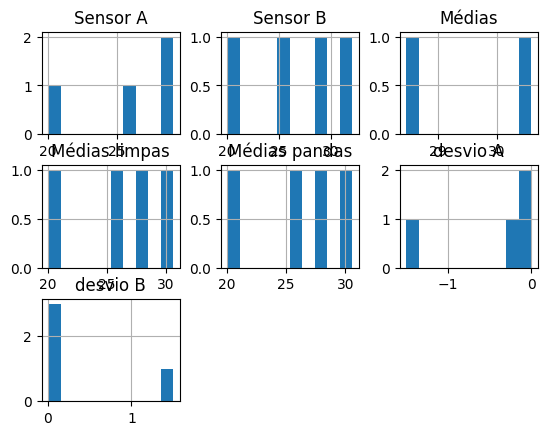

In [ ]:
df1.hist()

# Exercício 6

Mostre os histogramas do dataframe do exercício anterior.

# Exercício 7

A partir do dataframe do exercício anterior crie uma nova coluna com o nome da agência (nome usado na coluna) que ofereceu a menor taxa de câmbio no dia.

In [ ]:
df1

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas,desvio A,desvio B
Data,,,,,,,
2018-02-01,20.0,20.0,NaN,20.00,20.00,0.00,0.00
2018-02-02,28.3,28.6,28.45,28.45,28.45,-0.15,0.15
2018-02-03,29.1,32.1,30.60,30.60,30.60,-1.50,1.50
2018-02-04,26.0,26.0,NaN,26.00,26.00,0.00,0.00


In [ ]:
# solução para o df1
nomes = df1.columns[:2]
df1[nomes]

,Sensor A,Sensor B
Data,,
2018-02-01,20.0,20.0
2018-02-02,28.3,28.6
2018-02-03,29.1,32.1
2018-02-04,26.0,26.0


In [ ]:
df1[nomes].values

array([[20. , 20. ],
       [28.3, 28.6],
       [29.1, 32.1],
       [26. , 26. ]])

In [ ]:
df1[nomes].values.argmin(axis=1)

array([0, 0, 0, 0])

In [ ]:
nomes[df1[nomes].values.argmin(axis=1)]

Index(['Sensor A', 'Sensor A', 'Sensor A', 'Sensor A'], dtype='object')

In [ ]:
df1['Menor sensor'] = nomes[df1[nomes].values.argmin(axis=1)]
df1

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas,desvio A,desvio B,Menor sensor
Data,,,,,,,,
2018-02-01,20.0,20.0,NaN,20.00,20.00,0.00,0.00,Sensor A
2018-02-02,28.3,28.6,28.45,28.45,28.45,-0.15,0.15,Sensor A
2018-02-03,29.1,32.1,30.60,30.60,30.60,-1.50,1.50,Sensor A
2018-02-04,26.0,26.0,NaN,26.00,26.00,0.00,0.00,Sensor A


## Junção de dataframes

A junção de múltiplos dataframes pode ser feita de duas maneiras:

- quando os dataframes tem as mesmas colunas e índices diferentes: concatenação (união)

- quando os dataframes tem colunas diferentes mas índices em comum: junção (join)

In [ ]:
#concatenação
frame1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']},
                       index=[0, 1, 2, 3])


frame2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                       'B': ['B4', 'B5', 'B6', 'B7'],
                       'C': ['C4', 'C5', 'C6', 'C7'],
                       'D': ['D4', 'D5', 'D6', 'D7']},
                       index=[4, 5, 6, 7])


frame3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                      'B': ['B8', 'B9', 'B10', 'B11'],
                      'C': ['C8', 'C9', 'C10', 'C11'],
                      'D': ['D8', 'D9', 'D10', 'D11']},
                      index=[8, 9, 10, 11])


frames = [frame1, frame2, frame3]
resultado = pd.concat(frames)

### Join

A junção entre tabelas com colunas diferentes mas índices comuns se faz indicando 'axis=1'. Em seguida, é possível definir o tipo da junção:

- inner: somente linhas cujos índices apareçam em todos os dataframes a serem juntados vão fazer parte da resposta

- outer: quando um índice de um dataframe não tem correspondente em outro os valores das colunas desse outro dataframe constarão como NaN

In [ ]:
frame4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                       'D': ['D2', 'D3', 'D6', 'D7'],
                       'F': ['F2', 'F3', 'F6', 'F7']},
                       index=[2, 3, 6, 7])

resultado2 = pd.concat([frame1, frame4], axis=1, sort=False)  # outer join por default
resultado3 = pd.concat([frame1, frame4], axis=1, sort=False,join='inner')
print(frame1,'\n',frame4,'\n',resultado2,'\n',resultado3)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3 
     B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7 
      A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7 
     A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3


É possível concatenar dataframes que eventualmente tenham sobreposição de índices ignorando todos os índices. Se os dataframes tiverem colunas diferentes e o ajuste será feito com NaNs.

In [ ]:
resultado4 = pd.concat([frame1, frame4], ignore_index=True, sort=False)
print(frame1,'\n',frame4,'\n',resultado4)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3 
     B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7 
      A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
4  NaN  B2  NaN  D2   F2
5  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7


# Exercício 7

Crie um segundo dataframe de cotações fictícias de ações de 3 fundos, usando datas parcialmente sobrepostas com as do dataframe de cotações do dólar. Em seguida, crie um dataframe com a junção (outer join) dos dois.

## Ordenando o dataframe

In [ ]:
df1.sort_values(by='Médias limpas', ascending=False)

,Sensor A,Sensor B,Médias,Médias limpas,Médias pandas,desvio A,desvio B,Menor sensor
Data,,,,,,,,
2018-02-03,29.1,32.1,30.60,30.60,30.60,-1.50,1.50,Sensor A
2018-02-02,28.3,28.6,28.45,28.45,28.45,-0.15,0.15,Sensor A
2018-02-04,26.0,26.0,NaN,26.00,26.00,0.00,0.00,Sensor A
2018-02-01,20.0,20.0,NaN,20.00,20.00,0.00,0.00,Sensor A
